# UCI Heart Disease Data EDA

## Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Exploration

In [59]:
df = pd.read_csv('heart.csv')

In [60]:
df.shape

(303, 14)

In [61]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [63]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


| Feature   | Description                                                        |
|-----------|--------------------------------------------------------------------|
| cp        | Chest pain type                                                    |
| thalach   | Maximum heart rate achieved                                        |
| ca        | Number of major vessels colored by fluoroscopy                     |
| thal      | Thalassemia                                                        |
| oldpeak   | ST depression induced by exercise relative to rest                 |
| restecg   | Resting electrocardiographic results                               |
| trestbps  | Resting blood pressure (in mm Hg)                                  |
| fbs       | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)              |
| chol      | Serum cholesterol in mg/dl                                         |
| exang     | Exercise induced angina (1 = yes; 0 = no)                          |
| slope     | Slope of the peak exercise ST segment                              |

In [64]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Univariate Analysis

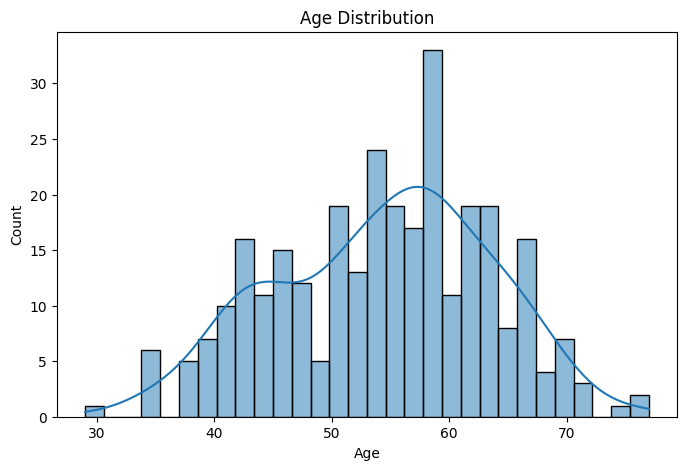

In [65]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

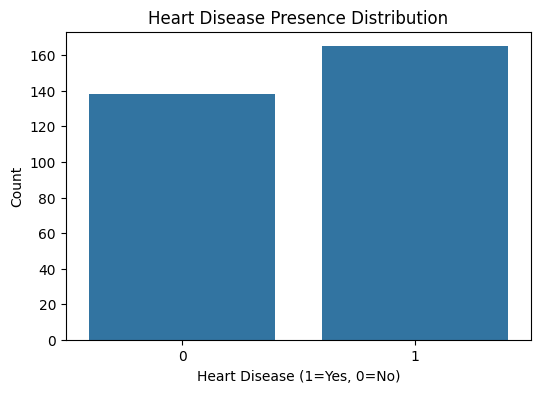

In [66]:
# Target variable distribution (heart disease presence)
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Presence Distribution')
plt.xlabel('Heart Disease (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()


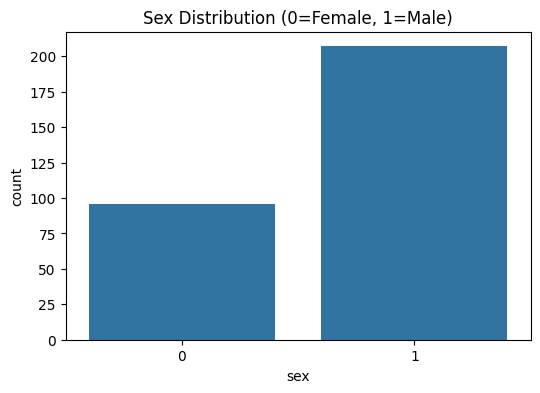

In [67]:
# Sex distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution (0=Female, 1=Male)')
plt.show()

## Bivariate Analysis

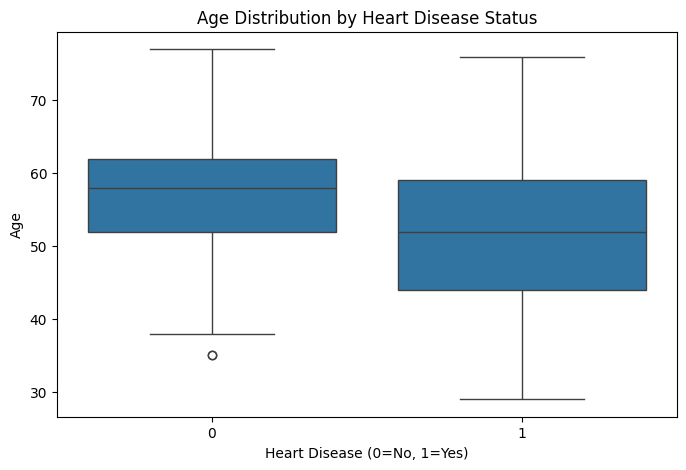

In [68]:
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

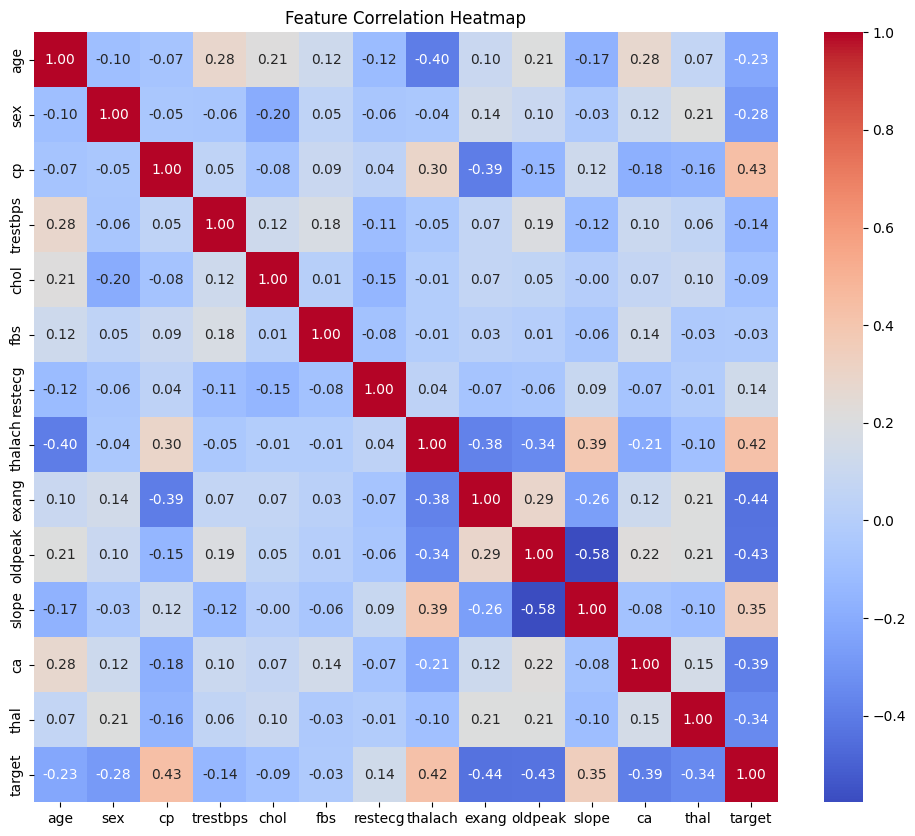

In [69]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


## Key Info
- Chest pain type and max heart rate are important features positively linked with heart disease.

- Exercise-induced angina and ST depression are negatively associated with heart disease presence.

- Age alone is not a strong predictor in this dataset despite being a common assumption.

- Younger patients are slightly more likely to have heart disease in this dataset.